# The Analysis

Begin by opening `cleaned.csv`. Make sure we can see all of the columns.

In [177]:
import pandas as pd

df =pd.read_csv ("cleaned.csv")

## Fix the column names

Sigh, I don't like the whole "GROSS SQUARE FEET" kind of thing. Let's turn that into `gross_square_feet` (along with all the other columns). 

In [178]:
df.head(2)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,3,BATH BEACH,01 ONE FAMILY HOMES,1,6361,19,NaN,A5,51 BAY 10TH STREET,NaN,...,1.0,0.0,1.0,1933.0,1660.0,1930.0,1,A5,649000,2007-08-31 00:00:00
1,3,BATH BEACH,01 ONE FAMILY HOMES,1,6363,37,NaN,A5,8611 16TH AVENUE,NaN,...,1.0,0.0,1.0,1893.0,1714.0,1930.0,1,A5,520000,2007-05-22 00:00:00


In [179]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head(2)

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,3,BATH BEACH,01 ONE FAMILY HOMES,1,6361,19,NaN,A5,51 BAY 10TH STREET,NaN,...,1.0,0.0,1.0,1933.0,1660.0,1930.0,1,A5,649000,2007-08-31 00:00:00
1,3,BATH BEACH,01 ONE FAMILY HOMES,1,6363,37,NaN,A5,8611 16TH AVENUE,NaN,...,1.0,0.0,1.0,1893.0,1714.0,1930.0,1,A5,520000,2007-05-22 00:00:00


## Convert the sale date to a datetime using `pd.to_datetime`

You could have also done it with `read_csv`! You can do `parse_dates=[...]` with a list of the dates you'd like to be turned into datetimes.

In [180]:
df['sale_date'] = pd.to_datetime(df.sale_date)
df.dtypes

borough                                    int64
neighborhood                              object
building_class_category                   object
tax_class_at_present                      object
block                                      int64
lot                                        int64
ease-ment                                float64
building_class_at_present                 object
address                                   object
apartment_number                          object
zip_code                                 float64
residential_units                        float64
commercial_units                         float64
total_units                              float64
land_square_feet                         float64
gross_square_feet                        float64
year_built                               float64
tax_class_at_time_of_sale                  int64
building_class_at_time_of_sale            object
sale_price                                 int64
sale_date           

## I've heard house buying is seasonal, with no sales in the winter. Which months of the year have the highest number of home sales?

Show me on a graph. Is my secondhand knowledge correct?

<AxesSubplot: xlabel='sale_date'>

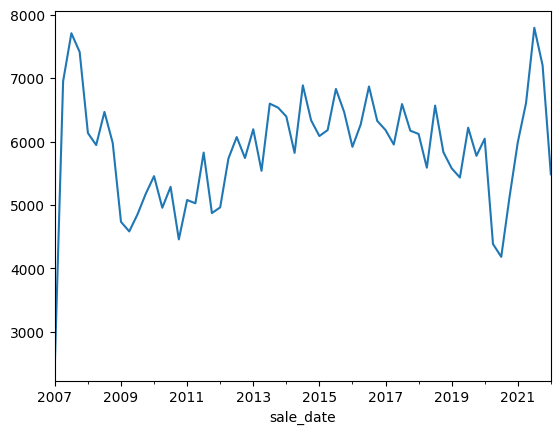

In [181]:
df.resample('3M', on='sale_date').sale_date.count().plot()

#How do you get the X-asis to show each quarter? 

## Hm. How about years? Is there a pattern there?

I'd like to see a bar chart (columns) of number of homes sold each year.

<AxesSubplot: xlabel='sale_date'>

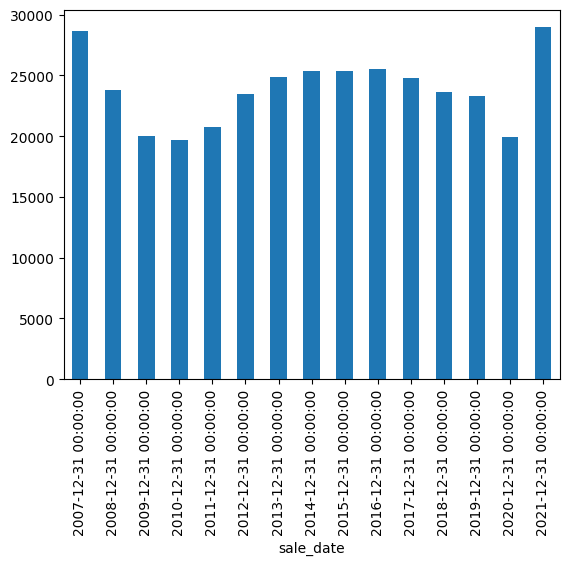

In [182]:
df.resample('Y', on='sale_date').sale_date.count().sort_index().plot(kind='bar', x="sale_date")

## That really reminds me of the [Great Recession](https://en.wikipedia.org/wiki/Great_Recession).

I'd like a little more detail, though, the years are just so *lumpy*. Can I see the number of house sales on a monthly basis through the whole dataset?

> I kept using `colname.count()` when we did this in class, which was a horrible habit of mine in like 2016. I got smarter later, and realized you can just use `.size()` to count the number of rows in each group.

And please make sure the x axis starts at zero. It's really a misrepresentation of the truth if it starts at 750 or whatever matplotlib wants to do by default.

<AxesSubplot: xlabel='sale_date'>

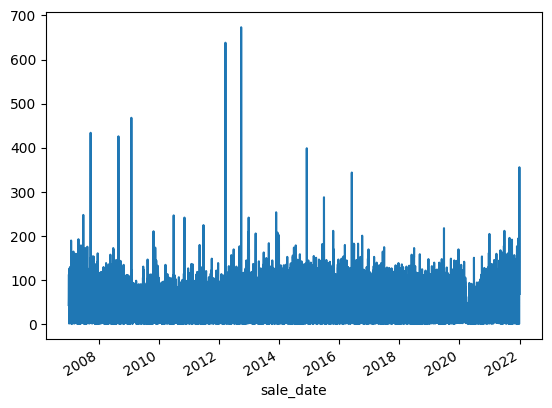

In [183]:
df.groupby('sale_date').size().plot()

## That's still kind of rough. Can we smooth it out some more?

I'd like to move from monthly house sales to something a little more spread out. Here are some frequency options from the pandas documentation:

```
B         business day frequency
C         custom business day frequency (experimental)
D         calendar day frequency
W         weekly frequency
M         month end frequency
SM        semi-month end frequency (15th and end of month)
BM        business month end frequency
CBM       custom business month end frequency
MS        month start frequency
SMS       semi-month start frequency (1st and 15th)
BMS       business month start frequency
CBMS      custom business month start frequency
Q         quarter end frequency
BQ        business quarter endfrequency
QS        quarter start frequency
BQS       business quarter start frequency
A         year end frequency
BA, BY    business year end frequency
AS, YS    year start frequency
BAS, BYS  business year start frequency
BH        business hour frequency
H         hourly frequency
T, min    minutely frequency
S         secondly frequency
L, ms     milliseconds
U, us     microseconds
N         nanoseconds
```

On top of just picking a frequency by itself, you can also add numbers! For example, `3A` is three years at a time, and `15D` is 15 days, etc. Maybe you could put that to use?

<AxesSubplot: >

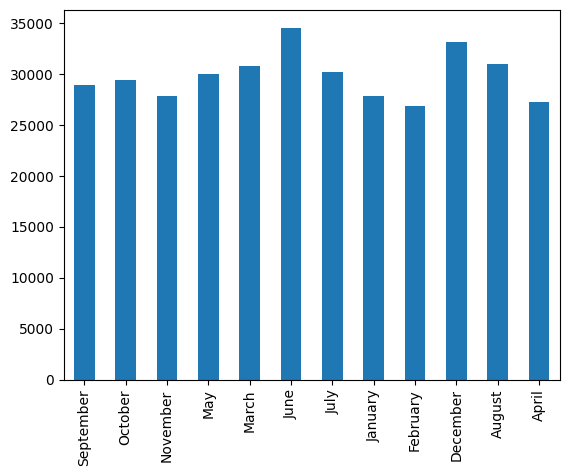

In [184]:
df['month'] = pd.to_datetime(df.sale_date, format="%y-%m-%d", errors='coerce').dt.strftime('%B')
df.month.value_counts().sort_index(ascending=False).plot(kind='bar')
#Why is it jumbled? 

Can you think of a better option than bundling this information in groups like this? Maybe from the cherry trees homework?

## But what about prices?

I'm also pretty confident that 

In [185]:
df['year_month'] = pd.to_datetime(df.sale_date, format="%y-%m", errors='coerce').dt.strftime('%y-%m')
df.dtypes

borough                                    int64
neighborhood                              object
building_class_category                   object
tax_class_at_present                      object
block                                      int64
lot                                        int64
ease-ment                                float64
building_class_at_present                 object
address                                   object
apartment_number                          object
zip_code                                 float64
residential_units                        float64
commercial_units                         float64
total_units                              float64
land_square_feet                         float64
gross_square_feet                        float64
year_built                               float64
tax_class_at_time_of_sale                  int64
building_class_at_time_of_sale            object
sale_price                                 int64
sale_date           

In [186]:
df.groupby('year_month').sale_price.value_counts()

year_month  sale_price
07-01       0             891
            600000         22
            650000         21
            10             16
            550000         16
                         ... 
21-12       85000000        1
            102000000       1
            220000000       1
            249205000       1
            256795000       1
Name: sale_price, Length: 117055, dtype: int64

In [187]:
df.groupby('sale_date').sale_price.value_counts()

sale_date   sale_price
2007-01-01  0             44
2007-01-02  0             33
            810000         2
            910000         2
            1              1
                          ..
2021-12-31  975000         1
            1175000        1
            1750000        1
            3000000        1
            48000000       1
Name: sale_price, Length: 209975, dtype: int64

In [188]:
df.groupby('sale_date').sale_price.median()
df.groupby('sale_date').sale_price.median().sort_values().head(20)

sale_date
2007-01-01    0.0
2014-04-26    0.0
2014-04-27    0.0
2014-05-03    0.0
2014-05-04    0.0
2014-05-11    0.0
2014-05-16    0.0
2014-05-17    0.0
2014-05-18    0.0
2014-05-24    0.0
2014-05-25    0.0
2014-05-26    0.0
2014-05-31    0.0
2014-06-01    0.0
2014-06-07    0.0
2014-06-08    0.0
2014-04-20    0.0
2014-06-14    0.0
2014-04-19    0.0
2014-04-13    0.0
Name: sale_price, dtype: float64

W... wait, what? What are those months where it seems like nothing was sold, or it was all sold for zero dollars? Let's find the top 20 months for lowest median sale price.

**??WHAT??**

Did any houses even sell then???? Let's look at the sales on `2012-09-30`.

In [189]:
df[df.sale_date == '2012-09-30']

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,month,year_month
84631,3,BUSHWICK,02 TWO FAMILY HOMES,1,3396,62,NaN,B2,125 WEIRFIELD STREET,NaN,...,2.0,1767.0,3180.0,1910.0,1,B2,299000,2012-09-30,September,12-09
84632,3,BUSHWICK,02 TWO FAMILY HOMES,1,3396,62,NaN,B2,125 WEIRFIELD STREET,NaN,...,2.0,1767.0,3180.0,1910.0,1,B2,0,2012-09-30,September,12-09
100537,3,WILLIAMSBURG-EAST,41 TAX CLASS 4 - OTHER,4,3003,24,NaN,G7,53 GRATTAN STREET,NaN,...,0.0,1860.0,0.0,0.0,4,Z9,0,2012-09-30,September,12-09
100538,3,WILLIAMSBURG-EAST,41 TAX CLASS 4 - OTHER,4,3003,25,NaN,G7,51 GRATTAN STREET,NaN,...,0.0,2270.0,0.0,0.0,4,Z9,0,2012-09-30,September,12-09
100539,3,WILLIAMSBURG-EAST,41 TAX CLASS 4 - OTHER,4,3003,26,NaN,G7,49 GRATTAN STREET,NaN,...,0.0,2500.0,0.0,0.0,4,Z9,0,2012-09-30,September,12-09


## We've got a LOT of weird stuff going on here! There are all of these FREE houses?

Let's calculate what percent of the time sale prices are zero.

**Two approaches:**

1. The low-tech approach is calculating the size of the entire dataset, then filtering for where sale price is zero and getting the size of that subset.
2. The other approach (THAT I LOVE) takes two steps:
    - Write the "is your sale price 0?" code, but don't feed it to `df[...]` yet. It should be giving you Trues and Falses.
    - Put parens around your statement, then add `.value_counts()`. This does a `value_counts()` on your Trues and Falses, thus calculating how often it's zero and how often it isn't!!!

In [190]:
(df.sale_price == 0.0).value_counts(normalize=True)*100

#37% of the time sale prices are zero 

False    62.930859
True     37.069141
Name: sale_price, dtype: float64

## Also, what's the "building class" thing?

I always assumed we were talking about houses, now there's this `41 TAX CLASS 4 - OTHER` thing? And when you google the addresses, they turn out to be parking lots???

**I guess we were really just making some dumb assumptions!** Let's narrow things down a bit. We'll start by looking at what the different building classes.

Look at what the most common building classes are in the dataset. There are a few columns, take a look at couple between `building_class_category` and `building_class_at_present` or `building_class_at_time_of_sale`. Maybe just check out the top 20 building classes in a sale?

In [191]:
df.building_class_at_time_of_sale.value_counts().head(20)

R4    40664
C0    33701
B1    33489
D4    30647
B3    18725
B2    17456
A5    15357
B9    13341
A1    13219
R1    12831
A9    11281
C3     9187
C6     8177
S2     7227
R3     7224
C2     7203
R2     6775
R5     6453
C1     6221
V0     4998
Name: building_class_at_time_of_sale, dtype: int64

While R4, C0 and B1 seem like wonderful building classes, *I have no idea what they mean*. Luckily there's [a website we can go to](https://www1.nyc.gov/assets/finance/jump/hlpbldgcode.html) that will tell us what each of them mean.

But also: I don't want to have to look them up all the time.

## Making those descriptions a column in our dataset

### Use `pd.read_html` to download the columns into a dataframe.

The first few rows should look like this:
    
||Building Code|Description|
|---|---|---|
0|A|ONE FAMILY DWELLINGS|
1|A0|CAPE COD|
2|A1|TWO STORIES - DETACHED SM OR MID|
3|A2|ONE STORY - PERMANENT LIVING QUARTER|

* **Tip:** It doesn't involve any fancy CSS selectors or anything.

In [192]:
building_codes_df = pd.read_html("https://www1.nyc.gov/assets/finance/jump/hlpbldgcode.html")
building_codes_df=building_codes_df[0]
building_codes_df
#Why can't I do 'building_codes_df.to_frame()' to change it to a dataframe?

,Building Code,Description
0,A,ONE FAMILY DWELLINGS
1,A0,CAPE COD
2,A1,TWO STORIES - DETACHED SM OR MID
3,A2,ONE STORY - PERMANENT LIVING QUARTER
4,A3,LARGE SUBURBAN RESIDENCE
...,...,...
238,Z4,FOREIGN GOVERNMENT
239,Z5,UNITED NATIONS
240,Z7,EASEMENT
241,Z8,CEMETERY


### Combine the codes dataframe with our original dataframe

In [193]:
#to join the product codes to data_df table

#data_df = our dataframe of accidents
#product_codes = our dataframe of codes and meanings
#product_1 is the column with the code in the dataframe of accidents 
#this does not update the original dataframe. We need to save it as a new variable 

merged_df = df.merge(building_codes_df, left_on="building_class_at_time_of_sale",right_on="Building Code")

#If you accidents without matches in codes use how=left 

Feel free to fix up the new column headers so they're lower-case with `_` instead of spaces, if you want.

In [196]:
merged_df.columns = merged_df.columns.str.lower().str.replace(" ", "_")
merged_df.sample(10)

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,month,year_month,building_code,description
87109,3,CYPRESS HILLS,02 TWO FAMILY DWELLINGS,1,3955,14,NaN,B3,171 ELTON STREET,NaN,...,1404.0,1905.0,1,B3,0,2021-08-06,August,21-08,B3,TWO FAMILY CONVERTED FROM ONE FAMILY
145629,3,BENSONHURST,03 THREE FAMILY DWELLINGS,1,6310,31,NaN,C0,1466 83RD STREET,NaN,...,2739.0,1920.0,1,C0,600000,2015-04-15,April,15-04,C0,THREE FAMILIES
73189,3,CANARSIE,02 TWO FAMILY HOMES,1,8189,53,NaN,B1,732 EAST 102ND STREET,NaN,...,1540.0,1955.0,1,B1,0,2010-07-08,July,10-07,B1,TWO FAMILY BRICK
107506,3,BUSHWICK,02 TWO FAMILY DWELLINGS,2A,3420,26,NaN,C3,38 COVERT STREET,NaN,...,3200.0,1920.0,1,B2,0,2013-07-12,July,13-07,B2,TWO FAMILY FRAME
260261,3,OCEAN PARKWAY-SOUTH,13 CONDOS - ELEVATOR APARTMENTS,2,7124,1120,NaN,R4,71 VILLAGE ROAD NORTH,3G,...,0.0,2006.0,2,R4,458328,2012-08-03,August,12-08,R4,CONDO; RESIDENTIAL UNIT IN ELEVATOR BLDG.
345639,3,WILLIAMSBURG-NORTH,29 COMMERCIAL GARAGES,4,2312,23,NaN,G6,187 NORTH 8TH STREET,NaN,...,0.0,0.0,4,G6,27800000,2017-07-19,July,17-07,G6,LICENSED PARKING LOT
128104,3,GREENPOINT,02 TWO FAMILY DWELLINGS,1,2653,25,NaN,B9,703 HUMBOLDT STREET,NaN,...,2394.0,1899.0,1,B9,2100000,2021-10-25,October,21-10,B9,MISCELLANEOUS TWO FAMILY
343771,3,WILLIAMSBURG-CENTRAL,37 RELIGIOUS FACILITIES,4,2193,18,NaN,M1,152 RODNEY STREET,NaN,...,21470.0,1968.0,4,M1,0,2011-08-17,August,11-08,M1,"CHURCH, SYNAGOGUE, CHAPEL"
338332,3,FLATBUSH-EAST,27 FACTORIES,4,4760,38,NaN,F5,4909 CLARENDON ROAD,NaN,...,10400.0,1931.0,4,F5,1974000,2020-02-05,February,20-02,F5,FACTORY; LIGHT MANUFACTURING
162599,3,SUNSET PARK,03 THREE FAMILY DWELLINGS,1,672,23,NaN,C0,144 30TH STREET,NaN,...,1920.0,1910.0,1,C0,1100000,2017-07-10,July,17-07,C0,THREE FAMILIES


## Let's save again, just for safety's sake

Take your merged dataset and save it as, I don't know, `merged.csv` I guess. Remember to add `index=False` so the index doesn't get saved as a column!

In [197]:
df.to_csv('merged.csv', index=False)